# I. Import necessary libraries

In [1]:
#import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV #for cross validation

#models used
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
#neural network
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('./heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


https://libres.uncg.edu/ir/ecsu/f/Brandon_Simmons_Thesis-Final.pdf

According to this paper "the target variable coding
for the Kaggle data should be reversed; or else, it must be interpreted as ‘0’ for ‘Heart
Disease’ and ‘1’ for ‘No Heart Disease’"

In [3]:
# reversing the values so that 1 == heart disease, 0 == no heart disease
df['target'] = df['target'].replace(1, 2) # use temp number to swap values
df['target'] = df['target'].replace(0, 1)
df['target'] = df['target'].replace(2, 0)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,1


# II. Examine Data set



In [4]:
df.shape

(1025, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,1


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.486829
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#check and if missing values need to clean dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
#break down column info
info = ["age","1: male, 0: female","chest pain type, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 1 = normal; 2 = fixed defect; 3 = reversable defect"]

for i in range(len(info)):
    print(df.columns[i]+":\t\t"+info[i])

age:		age
sex:		1: male, 0: female
cp:		chest pain type, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic
trestbps:		resting blood pressure
chol:		 serum cholestoral in mg/dl
fbs:		fasting blood sugar > 120 mg/dl
restecg:		resting electrocardiographic results (values 0,1,2)
thalach:		 maximum heart rate achieved
exang:		exercise induced angina
oldpeak:		oldpeak = ST depression induced by exercise relative to rest
slope:		the slope of the peak exercise ST segment
ca:		number of major vessels (0-3) colored by flourosopy
thal:		thal: 1 = normal; 2 = fixed defect; 3 = reversable defect


In [9]:
#examine target column
df["target"].unique()

array([1, 0])

0 and 1 indicates classification where 1 = heart disease, 0 = healthy

Check correlations between column and target

In [10]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


fbs shows weakest correlation comparred to others

# III. Exploratory Data Analysis



Analyze target column

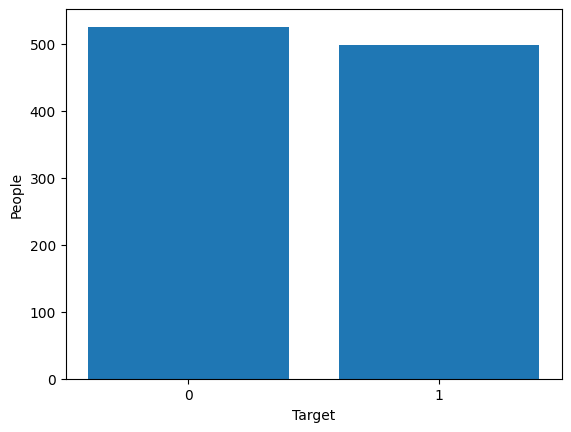

pecent of patients with heart issues:  48.68
pecent of patients without heart issues:  51.32


In [11]:
total = len(df)
disease = len(df[df['target'] ==1])
healthy = len(df[df['target']== 0])

plt.bar(['0','1'],[healthy, disease])
plt.xlabel('Target')
plt.ylabel('People')
plt.show()

disease = round((disease/total)*100, 2)
healthy = round((healthy/total)*100, 2)
print('pecent of patients with heart issues: ', disease)
print('pecent of patients without heart issues: ', healthy)

1. Sex

In [12]:
num_male = len(df[(df['sex']==1)])
num_female = len(df[(df['sex']==0)])
print(num_male, num_female)

713 312


In [13]:
# we see a much smaller amouont of female data which could be important

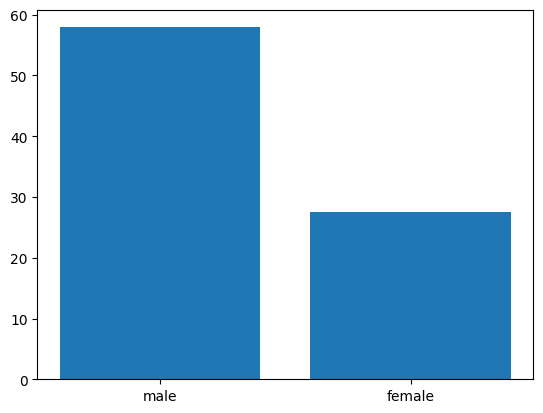

percent of males with heart disease: 57.92
percent of females with heart disease: 27.56


In [33]:
male_dis = len(df[(df['sex']==1) & (df['target']== 1)]) / len(df[df['sex'] == 1]) * 100
female_dis = len(df[(df['sex']==0) & (df['target']== 1)]) / len(df[df['sex']==0]) * 100

plt.bar(['male', 'female'], [male_dis, female_dis])
plt.show()
print('percent of males with heart disease:', round(male_dis,2))
print('percent of females with heart disease:', round(female_dis,2))

In [14]:
# we see that males are more likely to have heart disease according to the data
# note that data shows much higher proporrtion of males whith heart disease compaared to females
#however most other data suggests females tend to have a higher chance of getting heart disease
#moght creae two models, one for males and one for females

2. Chest Pain (4 values 0 to 3)

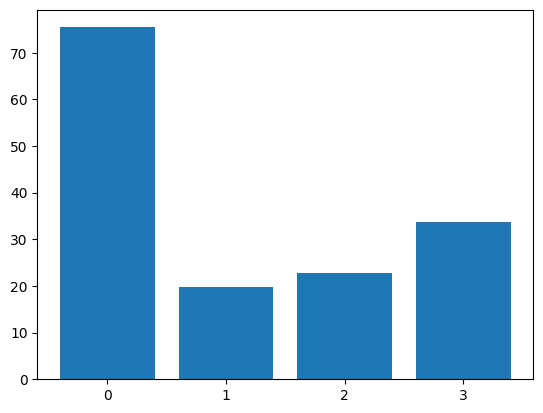

pecent of people who reported level 0 chest pain: 75.45
pecent of people who reported level 1 chest pain: 19.76
pecent of people who reported level 2 chest pain: 22.89
pecent of people who reported level 3 chest pain: 33.77


In [15]:
cp = [0,0,0,0]
for i in range(4):
  cp[i] = len(df[(df['cp'] == i) & (df['target'] == 1)]) / len(df[df['cp']==i]) * 100


plt.bar(['0', '1', '2', '3'], cp)
plt.show()

for i in range(len(cp)):
  print(f"pecent of people who reported level {i} chest pain: {round(cp[i],2)}")


In [16]:
# we see that those who report no chest pain had a much higher chance of having heart disease
# which is again interesting thing to note

3. Resting Electrocardiographic Results (values 0 to 2)

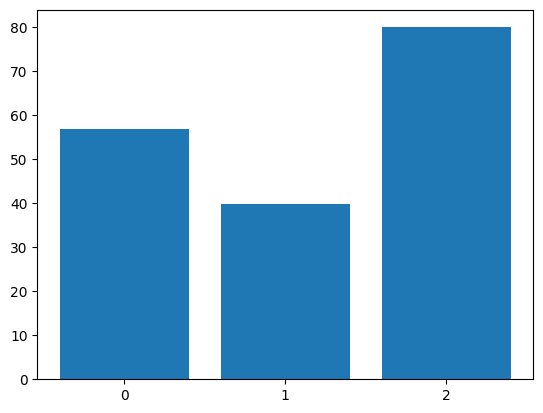

pecent of people who had a restecg level of 0: 56.94
pecent of people who had a restecg level of 1: 39.77
pecent of people who had a restecg level of 2: 80.0


In [17]:
rest_ecg = [0,0,0]

for i in range(3):
  rest_ecg[i] = len(df[(df['restecg']== i) & (df['target']) == 1]) / len(df[df['restecg'] == i]) * 100

plt.bar(['0', '1', '2'], rest_ecg)
plt.show()

for i in range(3):
  print(f"pecent of people who had a restecg level of {i}: {round(rest_ecg[i],2)}")



In [18]:
# we see that those with level 1 had a slighlty lower chance of haveing heart disease
# and those with level 2 had a slightly higher chance

4. Exercise Induced Angina

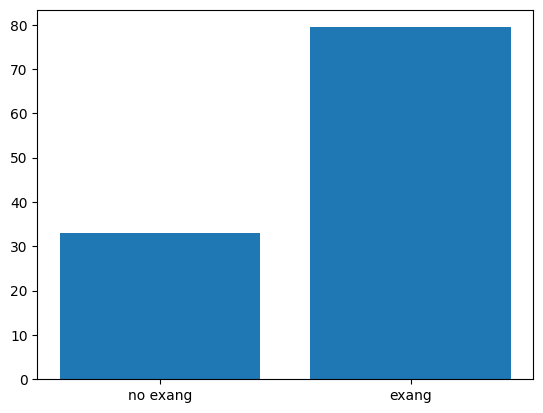

pecent of people who had an exang score of 0: 33.09
pecent of people who had an exang score of 1: 79.42


In [19]:
exang = [0,1]

for i in range(2):
  exang[i] = len(df[(df['exang']== i) & (df['target']) == 1]) / len(df[df['exang'] == i]) * 100

plt.bar(['no exang', 'exang'], exang)
plt.show()

for i in range(2):
  print(f"pecent of people who had an exang score of {i}: {round(exang[i],2)}")



In [20]:
# we see that those who had an exercised induced angina have higher chances of haveing heart disease

5. thal

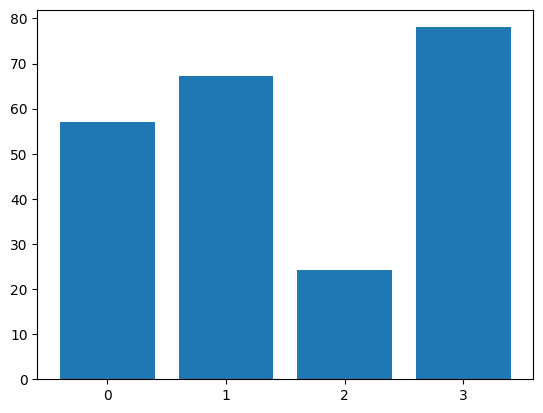

pecent of people who had an thal value of 0: 57.14
pecent of people who had an thal value of 1: 67.19
pecent of people who had an thal value of 2: 24.26
pecent of people who had an thal value of 3: 78.05


In [21]:
thal = [0,1,2,3]

for i in range(4):
  thal[i] = len(df[(df['thal']== i) & (df['target']) == 1]) / len(df[df['thal'] == i]) * 100

plt.bar(['0', '1', '2', '3'], thal)
plt.show()

for i in range(4):
  print(f"pecent of people who had an thal value of {i}: {round(thal[i],2)}")

In [22]:
# 2 is fixed defect and they have much lower % could indicate after defect was fixed
# they thus lived in such a way to reduce chances of getting heart disease again

6. Oldpeak

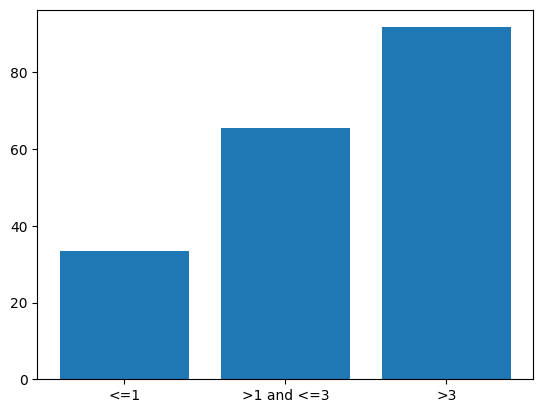

percent of people who had an oldpeak <=1: 33.5559265442404
percent of people who had an oldpeak >1 and <=3: 65.43909348441926
percent of people who had an oldpeak< >3: 91.78082191780823


In [23]:

oldpeak = [0,1,2]
oldpeak[0] = len(df[(df['oldpeak']<= 1) & (df['target']) == 1]) / len(df[df['oldpeak'] <= 1]) * 100
oldpeak[1] = len(df[(df['oldpeak'] > 1) & (df['oldpeak'] <= 3) &
 (df['target']) == 1]) / len(df[(df['oldpeak'] > 1) & (df['oldpeak'] <= 3)]) * 100
oldpeak[2] = len(df[(df['oldpeak'] > 3) & (df['target']) == 1]) / len(df[df['oldpeak'] >3]) * 100

plt.bar(['<=1', '>1 and <=3', '>3'], oldpeak)
plt.show()

print(f"percent of people who had an oldpeak <=1: {oldpeak[0]}")
print(f"percent of people who had an oldpeak >1 and <=3: {oldpeak[1]}")
print(f"percent of people who had an oldpeak< >3: {oldpeak[2]}")


In [24]:
# kind of chose abitrarily but we see that as oldpeak increased, rates of heart disease did as well

7. Age


In [25]:
df['age'].describe()

,age
count,1025.000000
mean,54.434146
std,9.072290
min,29.000000
25%,48.000000
50%,56.000000
75%,61.000000
max,77.000000


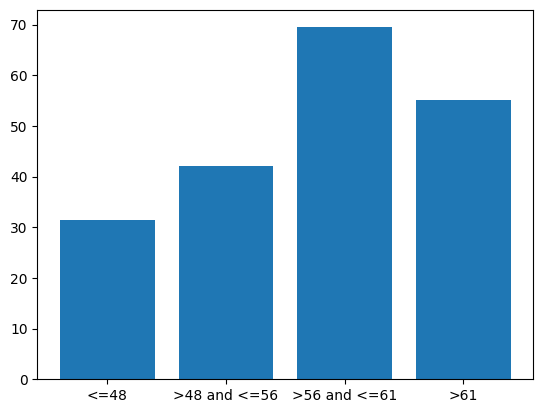

percent of people under 48 years old: 31.40794223826715
percent of people between 49 and 56 years old: 42.16417910447761
percent of people between 57 and 61 years old: 69.4560669456067
percent of people over 61 years old: 55.18672199170125


In [26]:
age = [0,1,2,3]
age[0] = len(df[(df['age']<= 48) & (df['target']) == 1]) / len(df[df['age'] <= 48]) * 100
age[1] = len(df[(df['age'] > 48) & (df['age'] <= 56) &
 (df['target']) == 1]) / len(df[(df['age'] > 48) & (df['age'] <= 56)]) * 100
age[2] = len(df[(df['age'] > 56) & (df['age'] <= 61) &
 (df['target']) == 1]) / len(df[(df['age'] > 56) & (df['age'] <= 61)]) * 100
age[3] = len(df[(df['age'] > 61) & (df['target']) == 1]) / len(df[df['age'] >61]) * 100

plt.bar(['<=48', '>48 and <=56', '>56 and <=61', '>61'], age)
plt.show()

print(f"percent of people under 48 years old: {age[0]}")
print(f"percent of people between 49 and 56 years old: {age[1]}")
print(f"percent of people between 57 and 61 years old: {age[2]}")
print(f"percent of people over 61 years old: {age[3]}")



In [27]:
#generally see an increase in heart disease rates as people get older

8. CA number of major vessels (0-3) colored by flourosopy

In [28]:
df['ca'].describe()

,ca
count,1025.000000
mean,0.754146
std,1.030798
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,4.000000


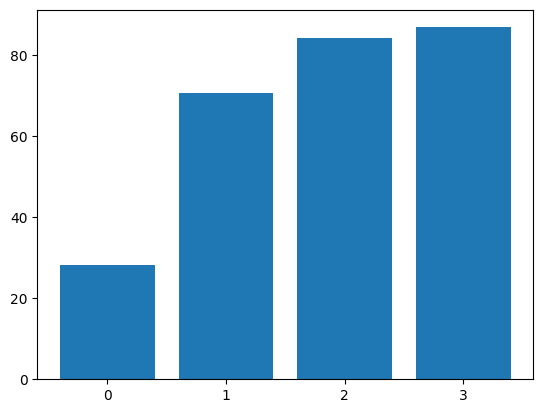

pecent of people who had an ca value of 0: 28.2
pecent of people who had an ca value of 1: 70.8
pecent of people who had an ca value of 2: 84.33
pecent of people who had an ca value of 3: 86.96


In [29]:
# max says 4 but we want range form 0 to 3 so we'll relplce with 3 since
# higher number just indicates more were colored so we can say >=3

df['ca'].replace(4, 3)

ca = [0,1,2,3]

for i in range(4):
  ca[i] = len(df[(df['ca']== i) & (df['target']) == 1]) / len(df[df['ca'] == i]) * 100

plt.bar(['0', '1', '2', '3'], ca)
plt.show()

for i in range(4):
  print(f"pecent of people who had an ca value of {i}: {round(ca[i],2)}")

In [30]:
# we see that as CA inncreases, heart disease rates also increased

Text(0.5, 1.0, 'Heart disease rates by CA')

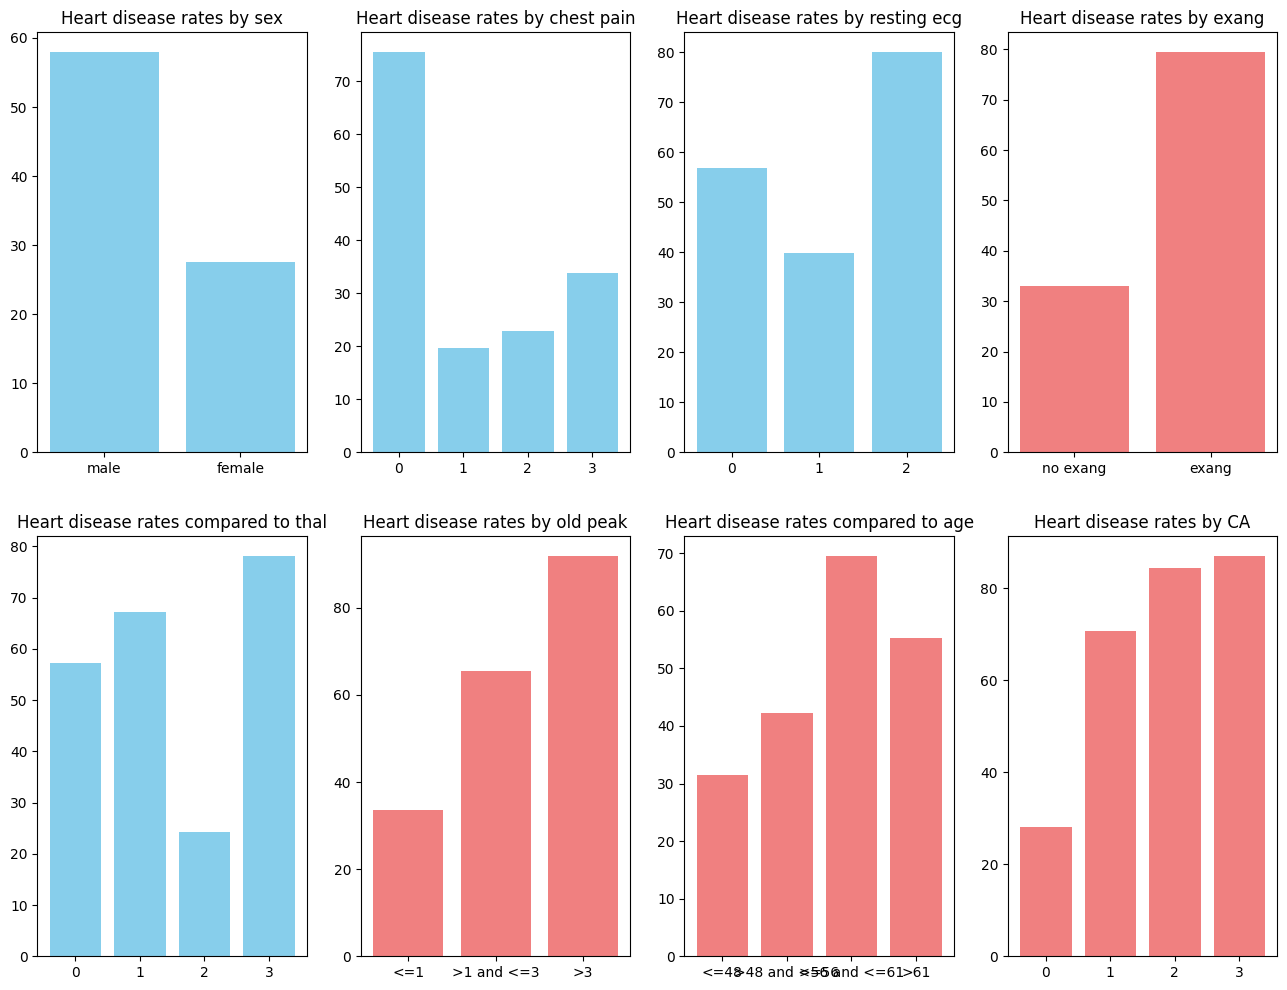

In [34]:
# Compiling the various graphs
fig, axes = plt.subplots(2, 4, figsize=(16, 12))
axes = axes.flatten()

axes[0].bar(['male', 'female'],[male_dis, female_dis], color='skyblue')
axes[0].set_title('Heart disease rates by sex')

axes[1].bar(['0', '1', '2', '3'], cp, color='skyblue')
axes[1].set_title('Heart disease rates by chest pain')

axes[2].bar(['0', '1', '2'], rest_ecg, color='skyblue')
axes[2].set_title('Heart disease rates by resting ecg')

axes[3].bar(['no exang', 'exang'], exang, color='lightcoral')
axes[3].set_title('Heart disease rates by exang')

axes[4].bar(['0', '1', '2', '3'], thal, color='skyblue')
axes[4].set_title('Heart disease rates compared to thal')

axes[5].bar(['<=1', '>1 and <=3', '>3'], oldpeak, color='lightcoral')
axes[5].set_title('Heart disease rates by old peak')

axes[6].bar(['<=48', '>48 and <=56', '>56 and <=61', '>61'], age, color='lightcoral')
axes[6].set_title('Heart disease rates compared to age')

axes[7].bar(['0', '1', '2', '3'], ca, color='lightcoral')
axes[7].set_title('Heart disease rates by CA')

In [35]:
# we can see some trends exist that make sense while some data may be off compared to what studies have found
# indicating quality of data may not be the best

In [36]:
# we can also see that the red graphs show more of a trend while the blue is more varied

# IV Train-Test Split

In [37]:
#since each feature is differeny, measures different things, and has differeny scales
# we might normalize the data depending model (like knn, logistic reg, or gradient descent, NN)

features = df.drop("target",axis=1)
target = df["target"]

scaler = MinMaxScaler()
norm_features = scaler.fit_transform(features)


In [38]:
# split the data into training and test data
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size=0.30,random_state=0)

Xn_train = scaler.fit_transform(X_train)
Xn_test = scaler.fit_transform(X_test)

In [39]:
print(X_train.shape, Xn_train.shape)
print(X_test.shape, Xn_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(717, 13) (717, 13)
(308, 13) (308, 13)
(717,)
(308,)


# V. Model Fitting

1. Logistic Regression

In [40]:
#using normalized data
lr_norm = LogisticRegression()

lr_norm.fit(Xn_train,Y_train)

lr_Yn_pred = lr_norm.predict(Xn_test)

In [41]:
#using raw data
lr = LogisticRegression()

lr.fit(X_train,Y_train)

lr_pred = lr.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
#calculate and compare score
lr_norm_acc = round(accuracy_score(lr_Yn_pred,Y_test)*100,2)
lr_acc = round(accuracy_score(lr_pred,Y_test)*100,2)

print(f"The accuracy score achieved using Logistic Regression (normalized data) is: {lr_norm_acc} %")
print(f"The accuracy score achieved using Logistic Regression is: {lr_acc} %")

The accuracy score achieved using Logistic Regression (normalized data) is: 87.99 %
The accuracy score achieved using Logistic Regression is: 87.01 %


In [43]:
# slightly better with normalized data
# with mre data there could be more variance nad outliers thus normalization would
# become more necessary

2. KNN

In [44]:
# we must determine the amount of neigbors to use
param_grid = {
        'n_neighbors': list(range(1, 16)),  # Explore k from 1 to 15
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }

knn = KNeighborsClassifier()
knn_norm = KNeighborsClassifier()

#using 5 fold cross validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search_norm = GridSearchCV(knn_norm, param_grid, cv=5, scoring='accuracy')



In [45]:
#fit data
grid_search.fit(X_train, Y_train)
grid_search_norm.fit(Xn_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [46]:
# retrieve models
best_knn_norm_model = grid_search_norm.best_estimator_
best_norm_params = grid_search_norm.best_params_
best_norm_score = grid_search_norm.best_score_

best_knn_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best norm parameters: {best_norm_params}")
print(f"Best norm cross-validation accuracy: {best_norm_score:.4f}")
print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

Best norm parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best norm cross-validation accuracy: 0.9819
Best parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best cross-validation accuracy: 0.9595


In [47]:
#predict and score
knn_Yn_pred=best_knn_norm_model.predict(Xn_test)
knn_Y_pred=best_knn_model.predict(X_test)

knn_norm_acc = round(accuracy_score(knn_Yn_pred,Y_test)*100,2)
knn_acc = round(accuracy_score(knn_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using KNN(norm) is: {knn_norm_acc} %")
print(f"The accuracy score achieved using KNN is: {knn_acc} %")

The accuracy score achieved using KNN(norm) is: 99.03 %
The accuracy score achieved using KNN is: 98.7 %


In [48]:
# we see high acccuracy compared to the previous model witth normalized having
# higher percent correct

3. XGBoost

In [49]:
# doesn't need normalization, random state is set so results are consistent
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

xgb_Y_pred = xgb_model.predict(X_test)

In [50]:
xgb_acc = round(accuracy_score(xgb_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using XGBoost is: {xgb_acc} %")

The accuracy score achieved using XGBoost is: 100.0 %


In [51]:
# 100% accuracy, interesting tto see if this holds up with introduction of new data
# since perfect accuracy is near impossible, overfitting?

4. Decision Tree

In [52]:
#no normalization is necessary
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_Y_pred = dt.predict(X_test)

In [53]:
dt_acc = round(accuracy_score(dt_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using Decision Tree is: {dt_acc} %")

The accuracy score achieved using Decision Tree is: 99.03 %


In [55]:
# high accuracy, can set random_state for reproducibility

5. Random Forest

In [54]:
#no normalization is necessary
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
rf_Y_pred = rf.predict(X_test)

In [56]:
rf_acc = round(accuracy_score(rf_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using Decision Tree is: {rf_acc} %")

The accuracy score achieved using Decision Tree is: 100.0 %


In [57]:
# 100% accuracy is seen again just like in XGBoost

6. SVM

In [60]:
#using normalized data
sv_norm = svm.SVC(kernel='linear', )
sv_norm.fit(Xn_train, Y_train)
svm_norm_Y_pred = sv_norm.predict(Xn_test)

In [61]:
#using raw data
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
svm_Y_pred = sv.predict(X_test)

In [62]:
#compare scores
svm_norm_acc = round(accuracy_score(svm_norm_Y_pred,Y_test)*100,2)
svm_acc = round(accuracy_score(svm_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using Linear SVM(Norm) is: {svm_norm_acc} %")
print(f"The accuracy score achieved using Linear SVM is: {svm_acc} %")

The accuracy score achieved using Linear SVM(Norm) is: 85.71 %
The accuracy score achieved using Linear SVM is: 85.39 %


In [63]:
# we see higher accuracy in using scaaled data but not by much

7. Naive Bayes

In [64]:
# probability based so no normalization needed
nb = GaussianNB()
nb.fit(X_train,Y_train)

nb_Y_pred = nb.predict(X_test)

In [65]:
nb_acc = round(accuracy_score(nb_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using Naive Bayes is: {nb_acc} %")

The accuracy score achieved using Naive Bayes is: 84.42 %


8. Stack (meta: xgboost, ensemble: KNN, RF, LR)

In [66]:
#chose arbitrarily but tried too make base models diverse and have xgboost as final decision maker

# Define base models
base_models = [
    ('dt', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier()),
    ('LR', LogisticRegression())
]

# Define meta-model
meta_model = xgb.XGBClassifier()

In [67]:
# Create and fit the StackingClassifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_clf.fit(Xn_train, Y_train) #used normalized data

StackingClassifier(cv=5,
                   estimators=[('dt', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier()),
                               ('LR', LogisticRegression())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 device=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 eval_metric=None,...
                                                 feature_weights=None,
                                                 gamma=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None, ...))

In [68]:
stack_Y_pred = stacking_clf.predict(Xn_test)
stack_acc = round(accuracy_score(stack_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using the Stack Ensemble is: {stack_acc} %")

The accuracy score achieved using the Stack Ensemble is: 99.03 %


In [69]:
# we see that the stack actually perfomed worse on the test set than
# some of the individual models

9. Neural Network

In [70]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
X_train.shape

(717, 13)

In [72]:
model.fit(X_train,Y_train,epochs=300, batch_size=32)

Epoch 1/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5416 - loss: 64.4500
Epoch 2/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4983 - loss: 53.9920
Epoch 3/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5110 - loss: 38.0209
Epoch 4/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5115 - loss: 24.8204
Epoch 5/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4922 - loss: 13.9608
Epoch 6/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5764 - loss: 4.5705
Epoch 7/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6199 - loss: 3.1737
Epoch 8/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6360 - loss: 2.9485
Epoch 9/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6101 - loss: 3.1849
Epoch 10/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6318 - loss: 3.0114
Epoch 11/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6137 - loss: 2.9544  
Epoch 12/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/s

In [73]:
nn_Y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [74]:
rounded = [round(x[0]) for x in nn_Y_pred]
nn_Y_pred = rounded

In [75]:
nn_acc = round(accuracy_score(nn_Y_pred,Y_test)*100,2)

print(f"The accuracy score achieved using Neural Network is: {nn_acc} %")

The accuracy score achieved using Neural Network is: 86.69 %


In [76]:
# only 86% acc but maybe model can be improved by adding/altering layers
# or increasing number of epochs.

#VI. Results

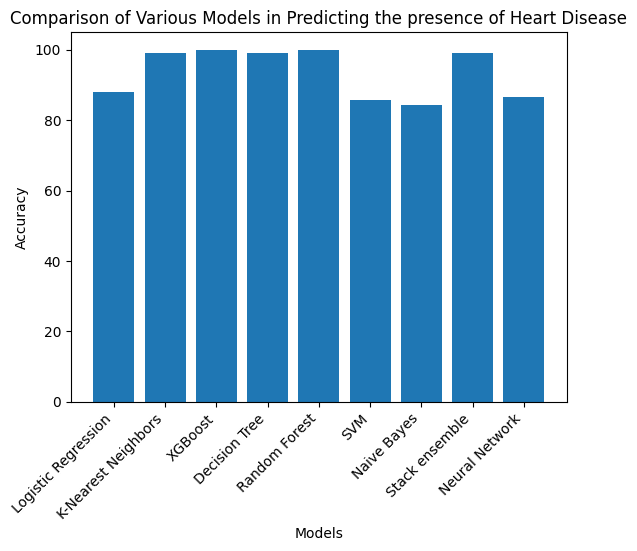

The accuracy score achieved using Logistic Regression is: 87.99 %
The accuracy score achieved using K-Nearest Neighbors is: 99.03 %
The accuracy score achieved using XGBoost is: 100.0 %
The accuracy score achieved using Decision Tree is: 99.03 %
The accuracy score achieved using Random Forest is: 100.0 %
The accuracy score achieved using SVM is: 85.71 %
The accuracy score achieved using Naive Bayes is: 84.42 %
The accuracy score achieved using Stack ensemble is: 99.03 %
The accuracy score achieved using Neural Network is: 86.69 %


In [79]:
#for display purposes, only the best model of each type shall be displayed
model = ['Logistic Regression', 'K-Nearest Neighbors', 'XGBoost', 'Decision Tree',
         'Random Forest', 'SVM', 'Naive Bayes', 'Stack ensemble', 'Neural Network']
accs = [lr_norm_acc, knn_norm_acc, xgb_acc, dt_acc, rf_acc, svm_norm_acc, nb_acc, stack_acc, nn_acc]

#display bar graph
plt.bar(model, accs)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Comparison of Various Models in Predicting the presence of Heart Disease')
plt.show()

#outputting actual accuracies below graph
for i in range(len(model)):
    print(f"The accuracy score achieved using {model[i]} is: {accs[i]} %")

# XII. Saving models for external use

In [ ]:
#choosing which model to use to predict chances of having heart disease based on patiient data
import pickle
# Assuming 'model' is your trained ML model
with open('heart_model.pkl', 'wb') as f:
  pickle.dump(xgb_model, f)